In [1]:

#imports
import umap
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def umap_projection (df, data_title = "", n_components = 2 ):
    
    '''
    
    This function reduces a multi feature datasets to a datasets with n_components using umap. 
    It accepts a dataframe, data title and n_components.
    '''
    
    
    embedding = umap.UMAP(n_neighbors=15,
                      metric='correlation', 
                      n_components = n_components).fit_transform(df)
    
    if n_components == 2:
        plt.scatter(embedding[:, 0], embedding[:, 1],)
        plt.gca().set_aspect('equal', 'datalim')
        plt.title('UMAP projection of the {a} data.'.format(a = data_title))
        plt.savefig(fname = data_title,dpi=1200)
    
    return pd.DataFrame(embedding)


Importing the dataset

In [3]:
        
dico = pd.read_json("dico_features.json")


# Punch Data 

Gegenhalter = dico.iloc[:,28:35]

Niederhalter = dico.iloc[:,35:56]
Niederhalter_1 = Niederhalter.iloc[:,0:7]
Niederhalter_2 = Niederhalter.iloc[:,7:14]
Niederhalter_4 = Niederhalter.iloc[:,14:22]

Stempel = dico.iloc[:,70:98]
Stempel_1 = Stempel.iloc[:, 0:7]
Stempel_2 = Stempel.iloc[:, 7:14]
Stempel_3 = Stempel.iloc[:, 14:21]
Stempel_4 = Stempel.iloc[:, 21:28]




# Coil Data

coil_data = dico.iloc[:,103:116]
coil_data = pd.DataFrame(coil_data).fillna(value = 0, )

entry_force = coil_data.iloc[:, 0:4]
exit_force = coil_data.iloc[:, 4:8]
thickness = coil_data.iloc[:, 8:12]




UMAP Projections

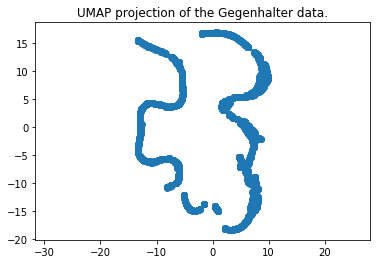

In [4]:
# Gegenhalter
Gegenhalter_umap = umap_projection(df = Gegenhalter, data_title= 'Gegenhalter')

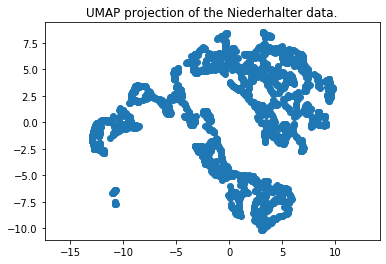

In [5]:
#Niederhalter

Niederhalter_umap = umap_projection(df = Niederhalter, data_title= 'Niederhalter')


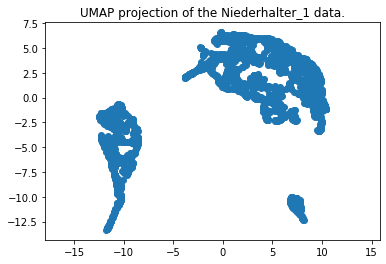

In [6]:
Niederhalter_1_umap = umap_projection(df = Niederhalter_1, data_title= 'Niederhalter_1')

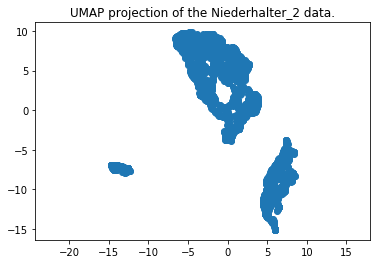

In [7]:
Niederhalter_2_umap = umap_projection(df = Niederhalter_2, data_title= 'Niederhalter_2')


/Users/youpele/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


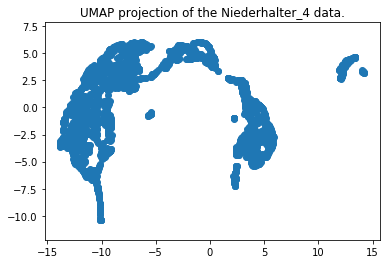

In [8]:
Niederhalter_4_umap = umap_projection(df = Niederhalter_4, data_title= 'Niederhalter_4')


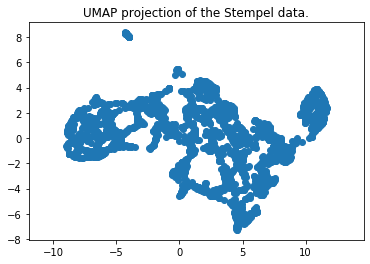

In [9]:

# Stempel
Stempel_umap = umap_projection(df = Stempel, data_title= "Stempel")


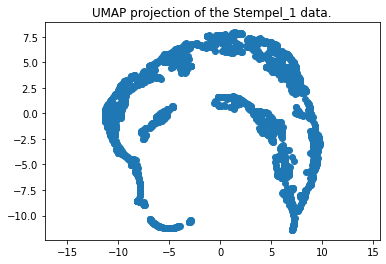

In [10]:
Stempel_1_umap = umap_projection(df = Stempel_1, data_title= "Stempel_1")

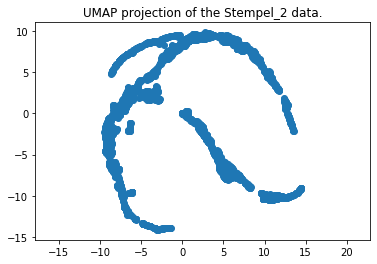

In [11]:
Stempel_2_umap = umap_projection(df = Stempel_2, data_title= "Stempel_2")


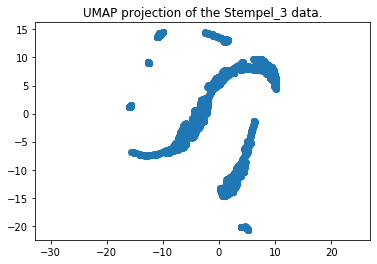

In [12]:
Stempel_3_umap = umap_projection(df = Stempel_3, data_title= "Stempel_3")

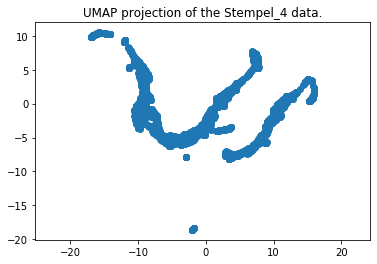

In [13]:
Stempel_4_umap = umap_projection(df = Stempel_4, data_title= "Stempel_4")

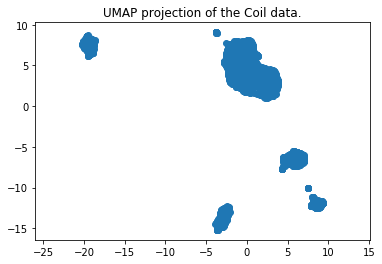

In [14]:
# Coil Data

coil_data_umap = umap_projection(df = coil_data, data_title= 'Coil', n_components=2)


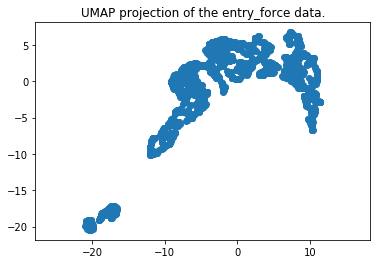

In [15]:
entry_force_umap = umap_projection(df = entry_force, data_title= 'entry_force', n_components=2)

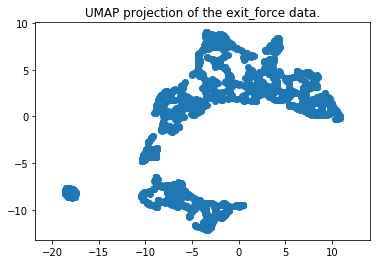

In [16]:
exit_force_umap = umap_projection(df = exit_force, data_title= 'exit_force', n_components=2)

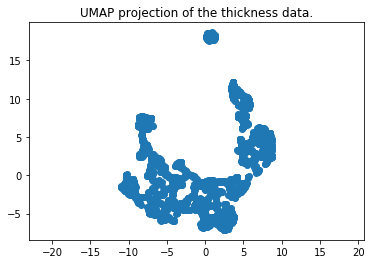

In [17]:
thickness_umap = umap_projection(df = thickness, data_title= 'thickness', n_components=2)

In [18]:

#Gegenhalter + Niederhalter + Stempel
Ge_Nie_Stem = pd.concat([Gegenhalter, Niederhalter, Stempel], axis=1)

Ge_Nie_Stem_umap_10 = umap_projection(df = Ge_Nie_Stem, 
                                   data_title= 'Gegenhalter + Niederhalter + Stempel',n_components=10)


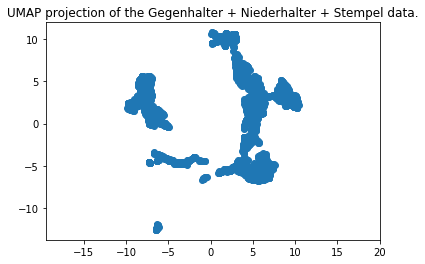

In [19]:

Ge_Nie_Stem_umap_2 = umap_projection(df = Ge_Nie_Stem, 
                                   data_title= 'Gegenhalter + Niederhalter + Stempel',n_components=2)


# Correlation Matrices with coil data

In [24]:
def corrMatrix(df_1, df_2, data_title = "", excel_export = "no"):
    
    
    """
    This function accepts two dataframes, merge them and returns a correlation matrix.
    """
        
    joining = pd.concat([df_1, df_2], axis =1)
    corrMatrix = joining.corr()

        
    name_1 =[x for x in globals() if globals()[x] is df_1][0]
    name_2 =[x for x in globals() if globals()[x] is df_2][0]  
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corrMatrix, interpolation='nearest')
    plt.title('Correlation Matrix of {a} and {b}.'.format(a= name_1 , b = name_2 ))
    fig.colorbar(cax)
    plt.savefig(fname = data_title,dpi=1200)
    if excel_export == "yes":
        corrMatrix.to_excel(str(data_title)+".xlsx")
        
    return corrMatrix

In [25]:
def multiple_corrMatrix( df, data_title):
        
        """
        This function accepts df (preferably, umap_ed df) and returns a 
        correlation matrix of the inputed df, the coil data and each data in it, that is 
        coil_data_umap,entry_force_umap, exit_force_umap, thickness_umap.
        """
        for n, i in enumerate ([coil_data_umap,entry_force_umap, exit_force_umap, thickness_umap]):
            
             mulitple_corrMatrix = corrMatrix(df_1=df,df_2=i,
                       excel_export="no", data_title = data_title+"_corr" +'%s' % str(n + 1))


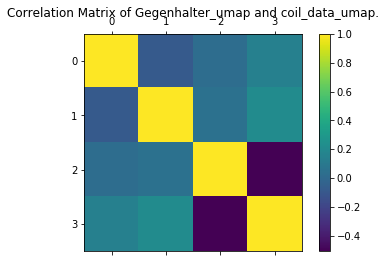

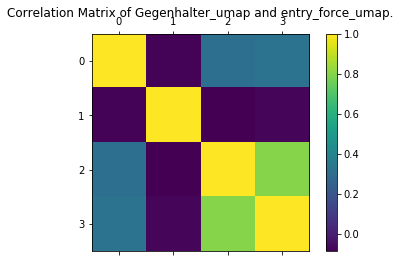

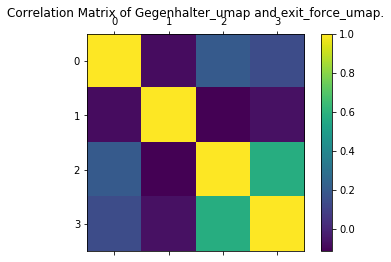

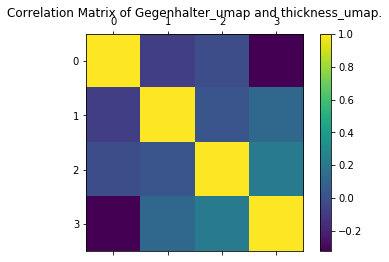

In [26]:

# Gegenhalter 
multiple_corrMatrix(df = Gegenhalter_umap, data_title="Gegenhalter")

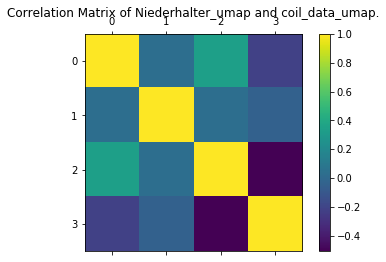

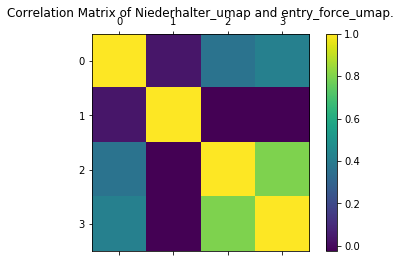

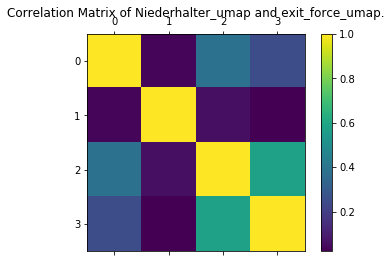

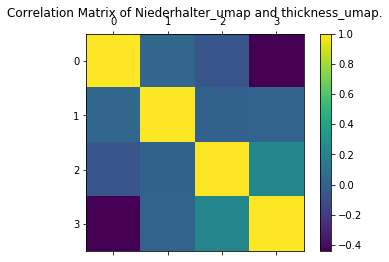

In [27]:
#Niederhalter

multiple_corrMatrix(df = Niederhalter_umap, data_title="Niederhalter")

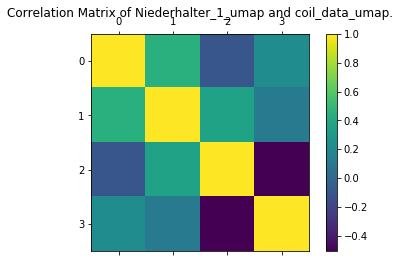

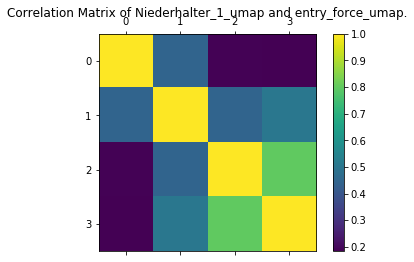

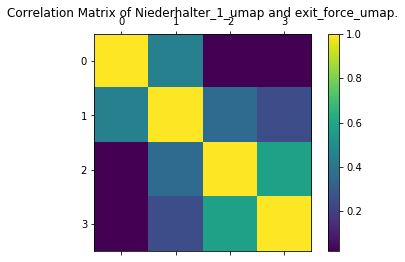

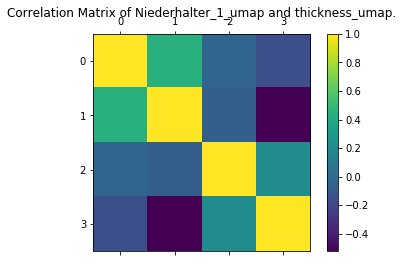

In [28]:
multiple_corrMatrix(df = Niederhalter_1_umap, data_title="Niederhalter_1")

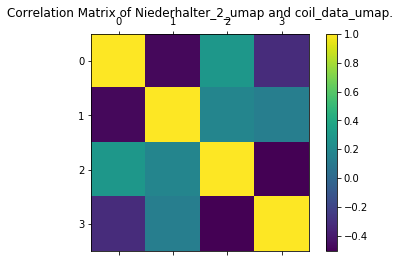

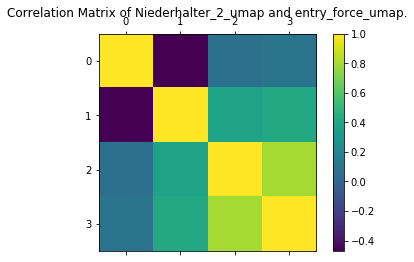

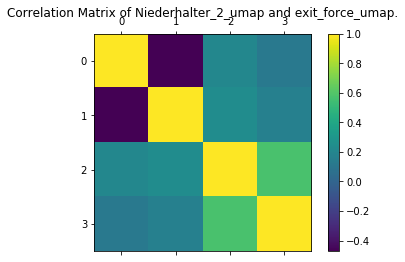

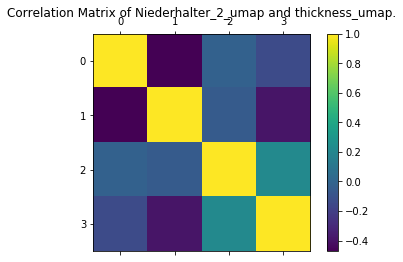

In [29]:
multiple_corrMatrix(df = Niederhalter_2_umap, data_title="Niederhalter_2")

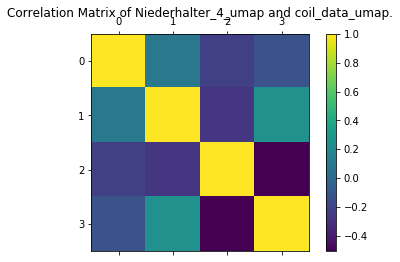

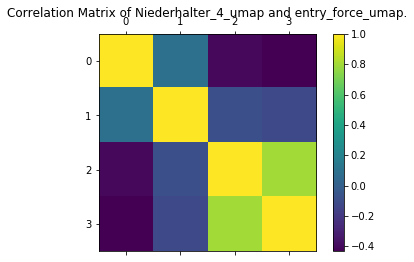

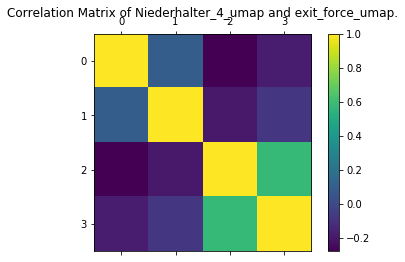

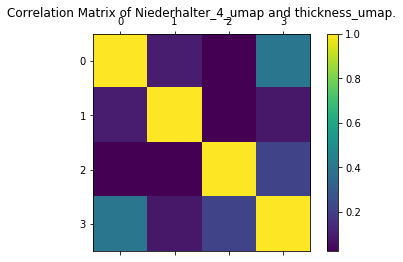

In [30]:
multiple_corrMatrix(df = Niederhalter_4_umap, data_title="Niederhalter_4")

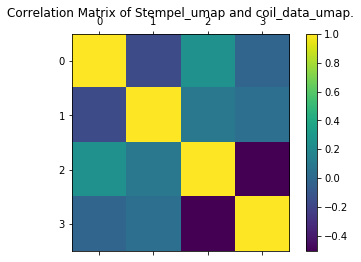

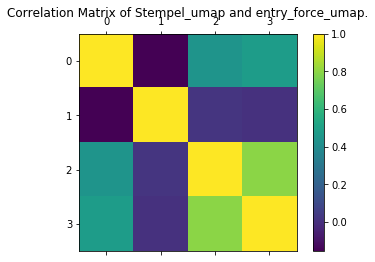

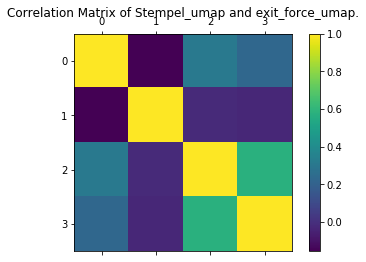

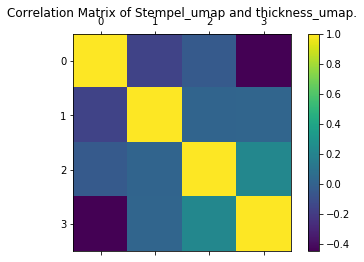

In [31]:
#Stempel

multiple_corrMatrix(df = Stempel_umap, data_title="Stempel")


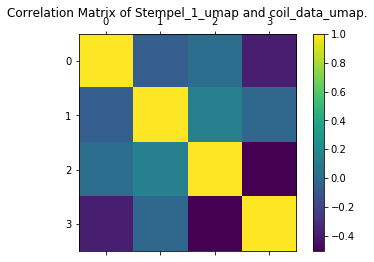

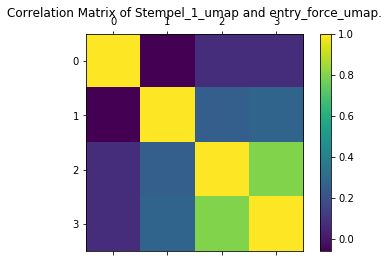

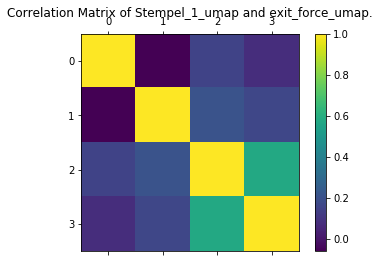

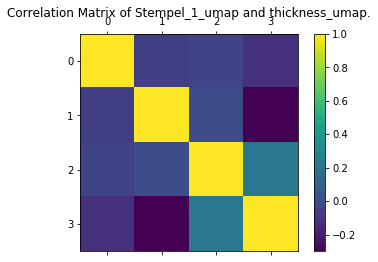

In [32]:
multiple_corrMatrix(df = Stempel_1_umap, data_title="Stempel_1")

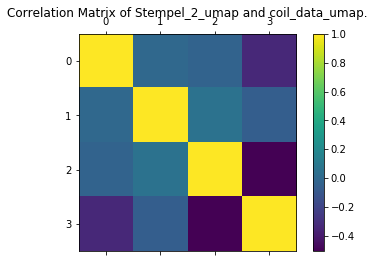

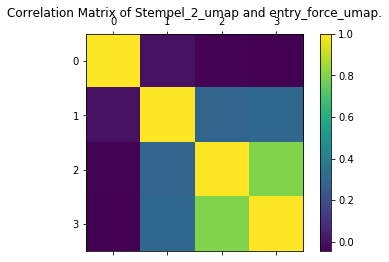

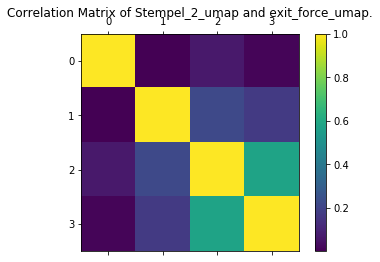

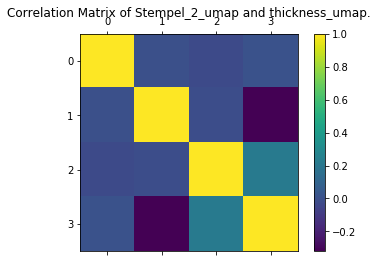

In [33]:
multiple_corrMatrix(df = Stempel_2_umap, data_title="Stempel_2")

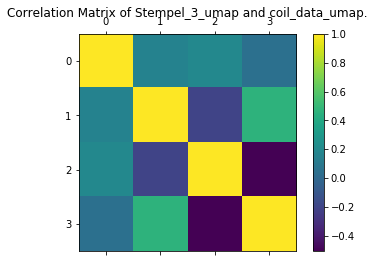

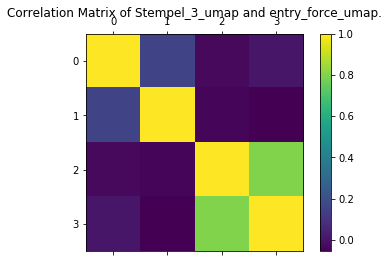

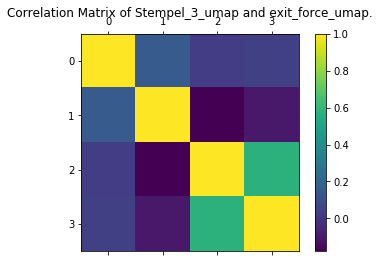

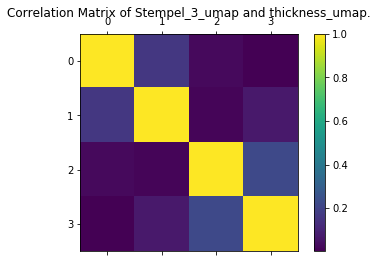

In [34]:
multiple_corrMatrix(df = Stempel_3_umap, data_title="Stempel_3")

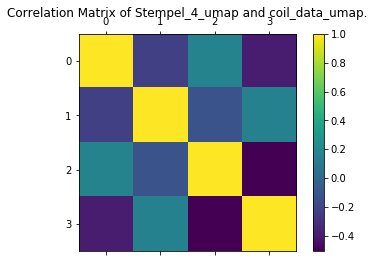

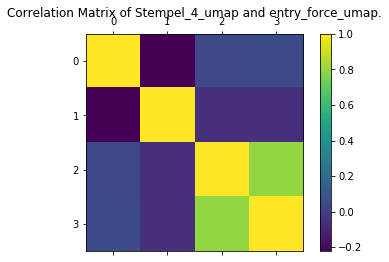

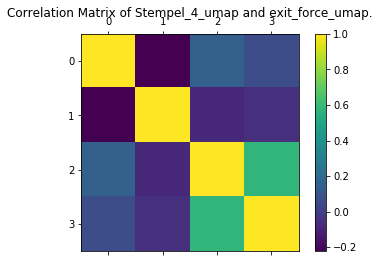

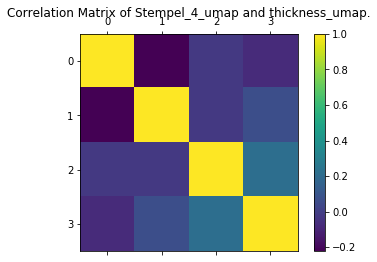

In [35]:
multiple_corrMatrix(df = Stempel_4_umap, data_title="Stempel_4")

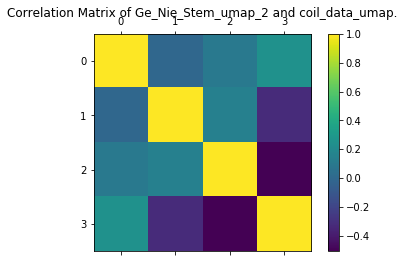

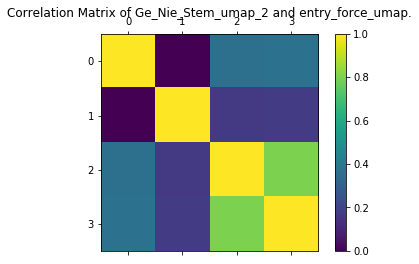

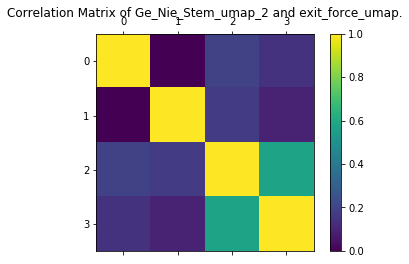

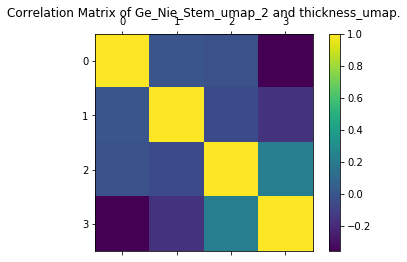

In [38]:

    
# Ge_Nie_Stem_umap_2
multiple_corrMatrix(df = Ge_Nie_Stem_umap_2, data_title="Ge_Nie_Stem_umap")

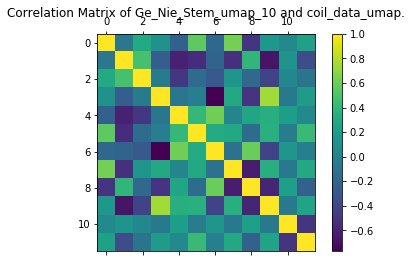

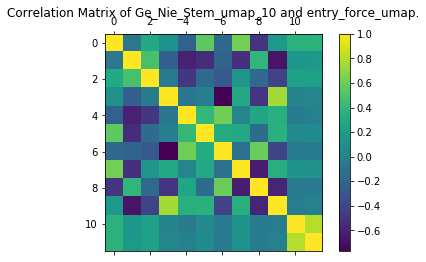

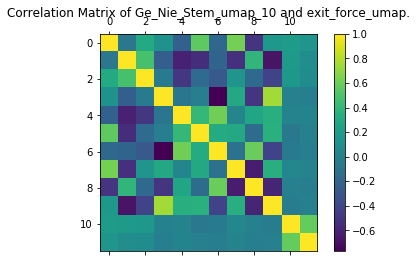

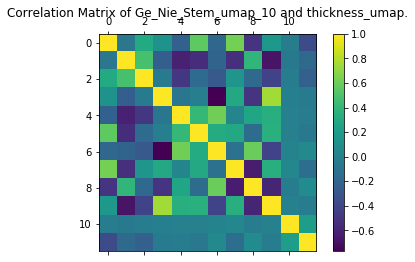

In [39]:
# Ge_Nie_Stem_umap_10

multiple_corrMatrix(df = Ge_Nie_Stem_umap_10, data_title="Ge_Nie_Stem_umap_10")
